In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns
%matplotlib inline
import glob

In [16]:
# reading data sets

path =r'data_set' 
allFiles = glob.glob(path + "/*.csv")
data = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
data = pd.concat(list_)

print(data)

data.info()

              Date  Longitude  Latitude  Elevation  Max Temperature  \
1/1/1979   84.0625    22.0121       220     28.326            9.203   
1/2/1979   84.0625    22.0121       220     27.250            9.656   
1/3/1979   84.0625    22.0121       220     28.410            9.948   
1/4/1979   84.0625    22.0121       220     27.590           12.280   
1/5/1979   84.0625    22.0121       220     27.595           11.640   
1/6/1979   84.0625    22.0121       220     25.919           10.602   
1/7/1979   84.0625    22.0121       220     27.277            8.853   
1/8/1979   84.0625    22.0121       220     27.859           10.353   
1/9/1979   84.0625    22.0121       220     27.689           10.601   
1/10/1979  84.0625    22.0121       220     28.947           10.459   
1/11/1979  84.0625    22.0121       220     29.268           10.777   
1/12/1979  84.0625    22.0121       220     28.529            9.689   
1/13/1979  84.0625    22.0121       220     29.270           10.135   
1/14/1

In [17]:
#looking at the data relations
data.corr()

,Date,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar
Date,1.000000e+00,-1.669025e-18,0.162171,-0.093996,-0.005303,0.007012,0.031348,0.104292,-0.005639,NaN
Longitude,-1.669025e-18,1.000000e+00,0.305575,-0.045245,-0.021783,-0.033192,0.059347,-0.050034,-0.008042,NaN
Latitude,1.621712e-01,3.055748e-01,1.000000,-0.072783,-0.022707,0.003339,0.044267,0.017389,-0.035493,NaN
Elevation,-9.399621e-02,-4.524474e-02,-0.072783,1.000000,0.473025,-0.210205,0.088988,-0.619283,0.536612,NaN
Max Temperature,-5.302510e-03,-2.178322e-02,-0.022707,0.473025,1.000000,0.297506,0.247992,0.264103,0.093644,NaN
Min Temperature,7.012027e-03,-3.319159e-02,0.003339,-0.210205,0.297506,1.000000,0.115765,0.475898,-0.247351,NaN
Precipitation,3.134789e-02,5.934654e-02,0.044267,0.088988,0.247992,0.115765,1.000000,-0.071041,-0.077303,NaN
Wind,1.042920e-01,-5.003378e-02,0.017389,-0.619283,0.264103,0.475898,-0.071041,1.000000,-0.404038,NaN
Relative Humidity,-5.639435e-03,-8.042329e-03,-0.035493,0.536612,0.093644,-0.247351,-0.077303,-0.404038,1.000000,NaN
Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0.24799221104417463
0.2641026557028283
0.09364364329220709


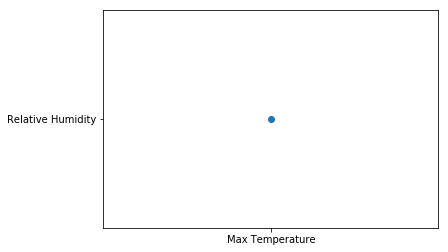

In [18]:
#checking relations between datas

correlation1 = data["Max Temperature"].corr(data["Precipitation"], method="pearson")
print(correlation1)

correlation2 = data["Max Temperature"].corr(data["Wind"], method="pearson")
print(correlation2)

correlation3 = data["Max Temperature"].corr(data["Relative Humidity"], method="pearson")
print(correlation3)



plt.scatter('Max Temperature','Relative Humidity')

In [19]:


# defining data
X = data[['Precipitation','Wind', 'Relative Humidity']]
y = data['Max Temperature']

In [20]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(186163, 3)
(46541, 3)
(186163,)
(46541,)


In [22]:
# using linear regression algo
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# predicting the value of y for X


y_prediction = linear_model.predict(X_test)
print(y_prediction)

[19.18832863 16.63303841 17.28175237 ... 17.07206399 17.25315077
 19.41369353]


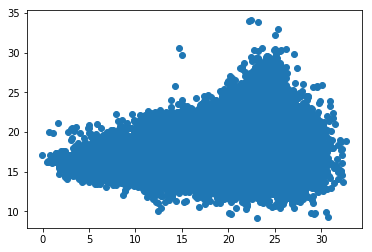

In [26]:
plt.scatter(y_test,y_prediction)



In [25]:
#finding error
from sklearn.metrics import r2_score
r2_score=(y_test, y_prediction)